This notebook contains examples of the D2 line of rubidium-87. Spectra for different light polarizations and magnetic field strengths are compared to the respective ElecSus counterpart in the low intensity limit.

In all examples, the interaction length between light and vapour is 2mm and the temperature are 20 degree celsius in the absence of Doppler broadening.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy as sp
from datetime import datetime
from scipy import constants as c
import sys
import importlib
import pkgutil
import elecsus
def import_submodules(module):
    """Import all submodules of a module, recursively."""
    for loader, module_name, is_pkg in pkgutil.walk_packages(
            module.__path__, module.__name__ + '.'):
        importlib.import_module(module_name)
import_submodules(elecsus)
sys.path.append( '..' )
import LindbladMasterEq as LME
package_name = 'Ahint'

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)
E_LCP = elecsus.libs.BasisChanger.lrz_to_xyz(np.array([1,0,0]))
E_RCP = elecsus.libs.BasisChanger.lrz_to_xyz(np.array([0,1,0]))
E_LP = np.array([1,0,0])

## Rb87 D2, LCP, B = 0 G

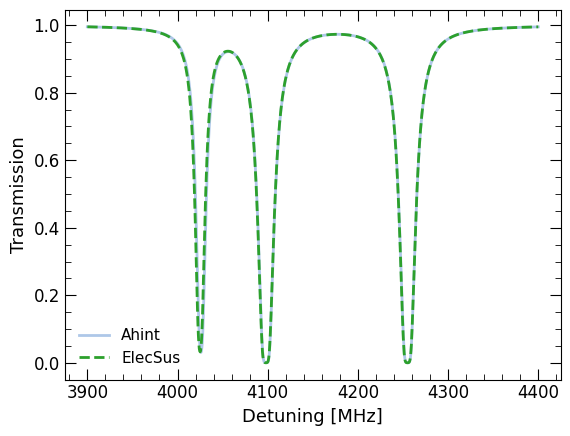

In [2]:
p_dict = {'Elem':'Rb','Dline':'D2', 'lcell':2e-3, 'T': 50.,
   'Bfield': 0, 'rb85frac': 0, 'Constrain': False, 'DoppTemp': -273.14999,
   'laserPower': 1e-15, 'laserWaist': 5e-3}
x = np.linspace(3900, 4400, 1000)
# x = np.linspace(-6000, 6000, 10000)
[y_elecsus] = elecsus.elecsus_methods.calculate(x, E_in=E_LCP, p_dict=p_dict, outputs=['S0'])
y_bwf = LME.get_spectra(x, E_in=E_LCP, p_dict=p_dict)
plt.figure()
plt.plot(x, y_bwf, c='C1', label=package_name)
plt.plot(x, y_elecsus, '--', c='C4', label='ElecSus')
plt.xlabel('Detuning [MHz]')
plt.ylabel('Transmission')
plt.legend(frameon=False)
# plt.savefig(f'{results_folder}/Rb87_D2_LCP_B_0G.png', dpi=200)

## Rb87 D2, LCP, B = 100 G

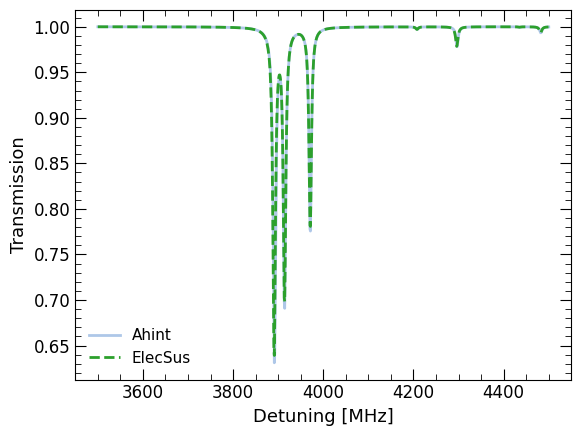

In [4]:
p_dict = {'Elem':'Rb','Dline':'D2', 'lcell':2e-3, 'T': 20.,
   'Bfield': 100, 'rb85frac': 0, 'Constrain': False, 'DoppTemp': -273.14999,
   'laserPower': 1e-15, 'laserWaist': 2e-3}
x = np.linspace(3500, 4500, 1000)
[y_elecsus] = elecsus.elecsus_methods.calculate(x, E_in=E_LCP, p_dict=p_dict, outputs=['S0'])
y_bwf = LME.get_spectra(x, E_in=E_LCP, p_dict=p_dict)
plt.figure()
plt.plot(x, y_bwf, c='C1', label=package_name)
plt.plot(x, y_elecsus, '--', c='C4', label='ElecSus')
plt.xlabel('Detuning [MHz]')
plt.ylabel('Transmission')
plt.legend(frameon=False)
# plt.savefig(f'{results_folder}/Rb87_D2_LCP_B_100G.png', dpi=200)